# Line plots with multifacets

In [3]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [5]:
nuqta=sns.load_dataset('dots')
nuqta.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


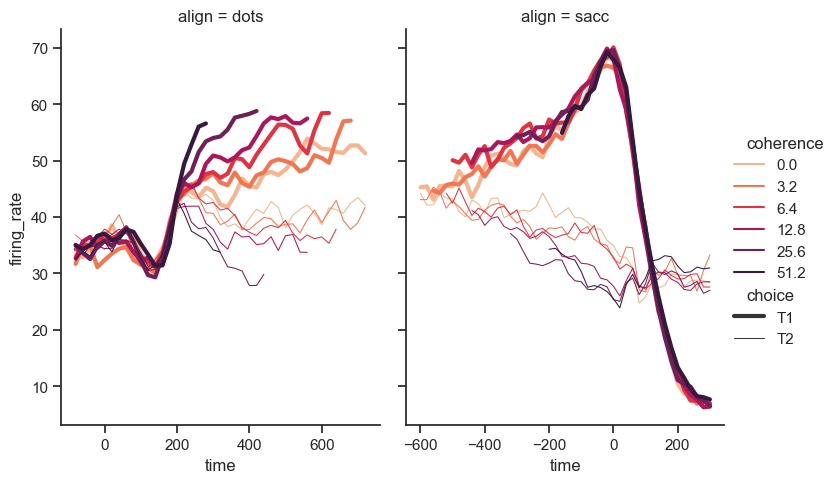

In [7]:
#setting a theme
sns.set_theme(style='ticks')
# defining a color palette
pelette=sns.color_palette('rocket_r')

# plot lineplot

sns.relplot(data=nuqta, x='time', y='firing_rate',hue='coherence', size='choice', col='align', kind='line', 
    size_order=['T1', 'T2'], palette=pelette, height=5, aspect=.75, facet_kws=(dict(sharex=False)))

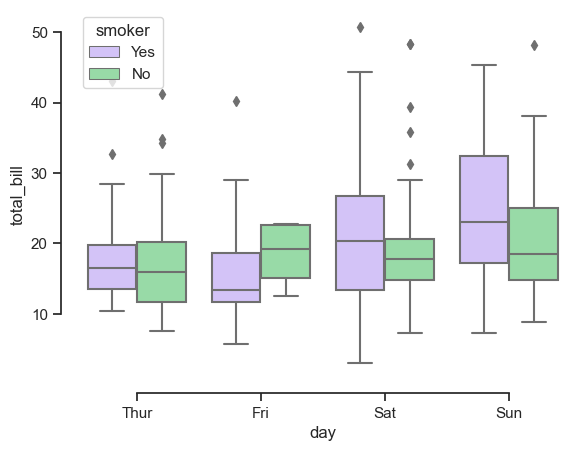

In [9]:
sns.set_theme(style='ticks', palette='pastel')

# load the example tips dataset
tips=sns.load_dataset('tips')

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='day', y='total_bill', hue='smoker', palette=['m','g'], data=tips)
sns.despine(offset=10, trim=True)

### violin plot

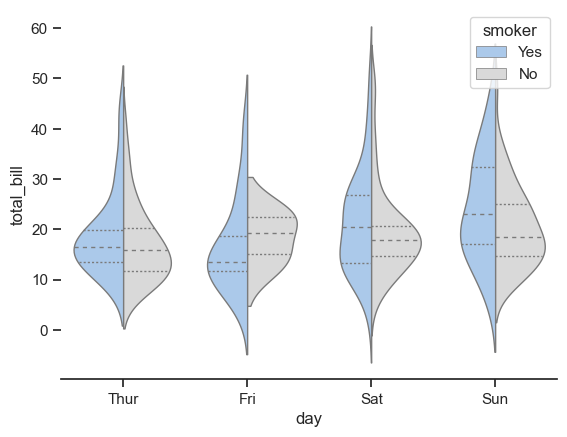

In [10]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=tips, x='day', y='total_bill', hue='smoker', split=True, 
    inner='quart', linewidth=1, palette={'Yes':'b', 'No':'.85'})
sns.despine(left=True)

# Subplot

<AxesSubplot:xlabel='carat', ylabel='price'>

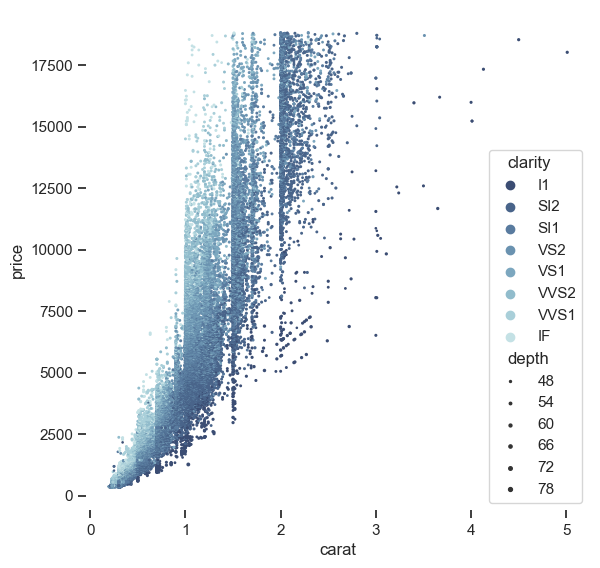

In [11]:
# load the example diamonds dataset
diamonds=sns.load_dataset('diamonds')

# Draw a scatter plot while assigning point colors and sizes to 
# different variables in the dataset
f, ax=plt.subplots(figsize=[6.5,6.5])
sns.despine(f, left=True, bottom=True)
clarity_ranking=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
sns.scatterplot(x='carat', y='price',
                hue='clarity', size='depth',
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1,8), linewidth=0,
                data=diamonds, ax=ax)

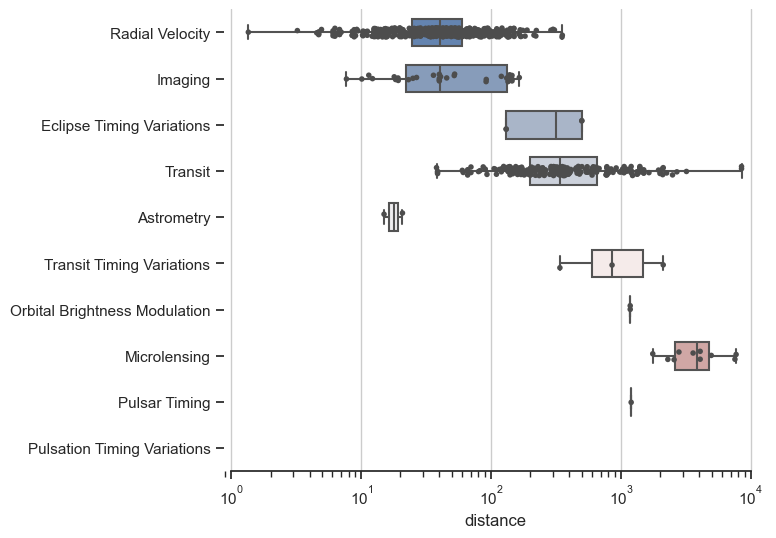

In [15]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7,6))
ax.set_xscale('log')

# Load the example planets dataset
planets=sns.load_dataset('planets')

# plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets, whis=[0,100], width=.6, palette='vlag')

# add in points to show each observation
sns.stripplot(x="distance", y='method', data=planets, size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

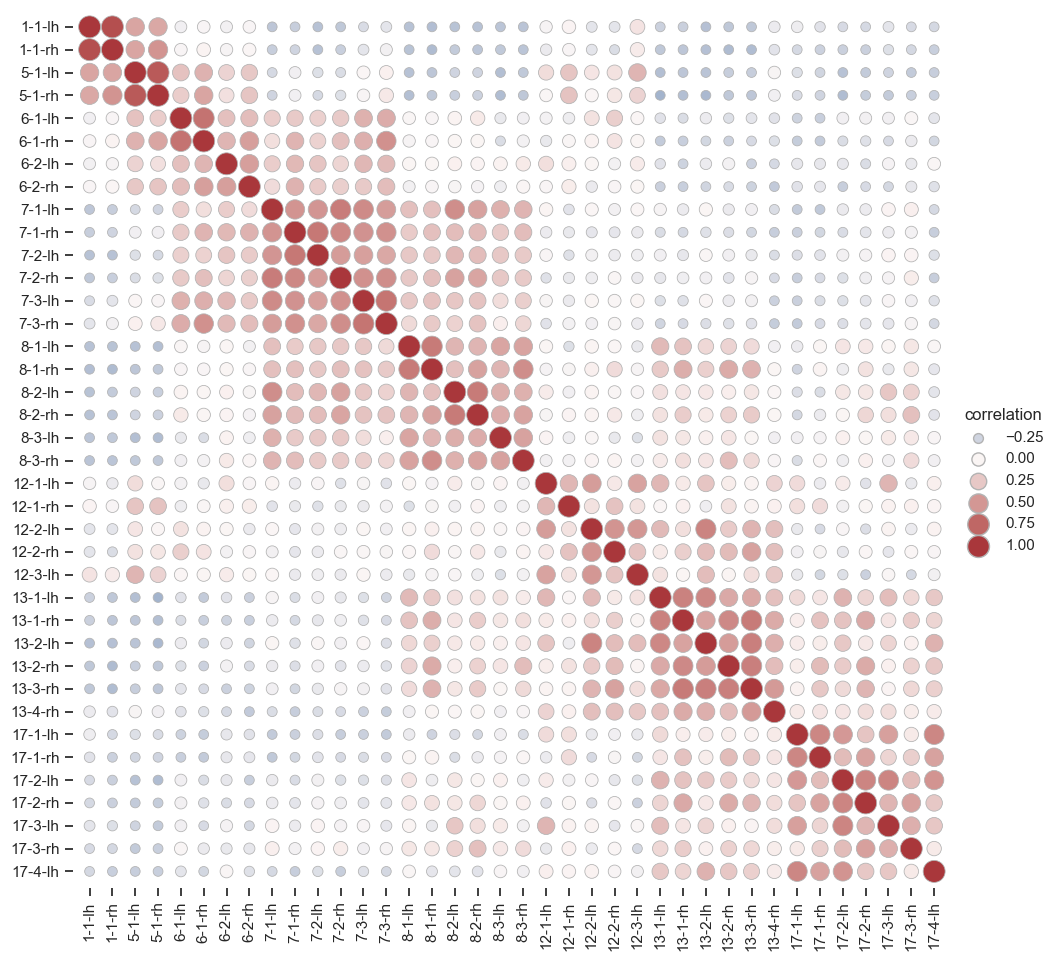

In [16]:
# load the brain network dataset, select subset and collapse the multiple-index
bn=sns.load_dataset('brain_networks', header=[0,1,2], index_col=0)

used_networks=[1,5,6,7,8,12,13,17]
used_columns=(bn.columns.get_level_values('network').astype(int).isin(used_networks))

bn=bn.loc[:, used_columns]
bn.columns=bn.columns.map("-".join)

# compute a correlation matrix and convert to long-form
corr_mat=bn.corr().stack().reset_index(name='correlation')

# Draw each cell as a scatter point with varying size and color
g=sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation",
    size='correlation', palette='vlag', hue_norm=(-1, 1),
    edgecolor=".7", height=10, sizes=(50,250), size_norm=(-.2,.8)
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect='equal')
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

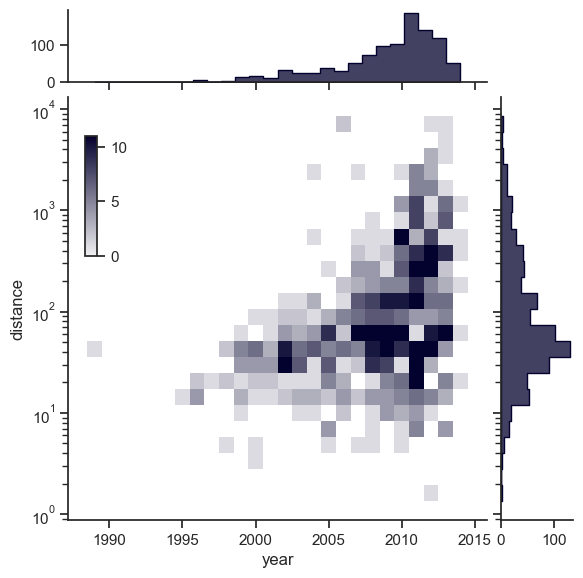

In [19]:
# load the planets dataset and initialize the figure
planets=sns.load_dataset('planets')
g=sns.JointGrid(data=planets,x='year', y='distance', marginal_ticks=True)

# set a log scalling on the y-axis
g.ax_joint.set(yscale="log")

# create an inset legend for the histogram colorbar
cax=g.figure.add_axes([.15,.55,.02,.2])

# add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

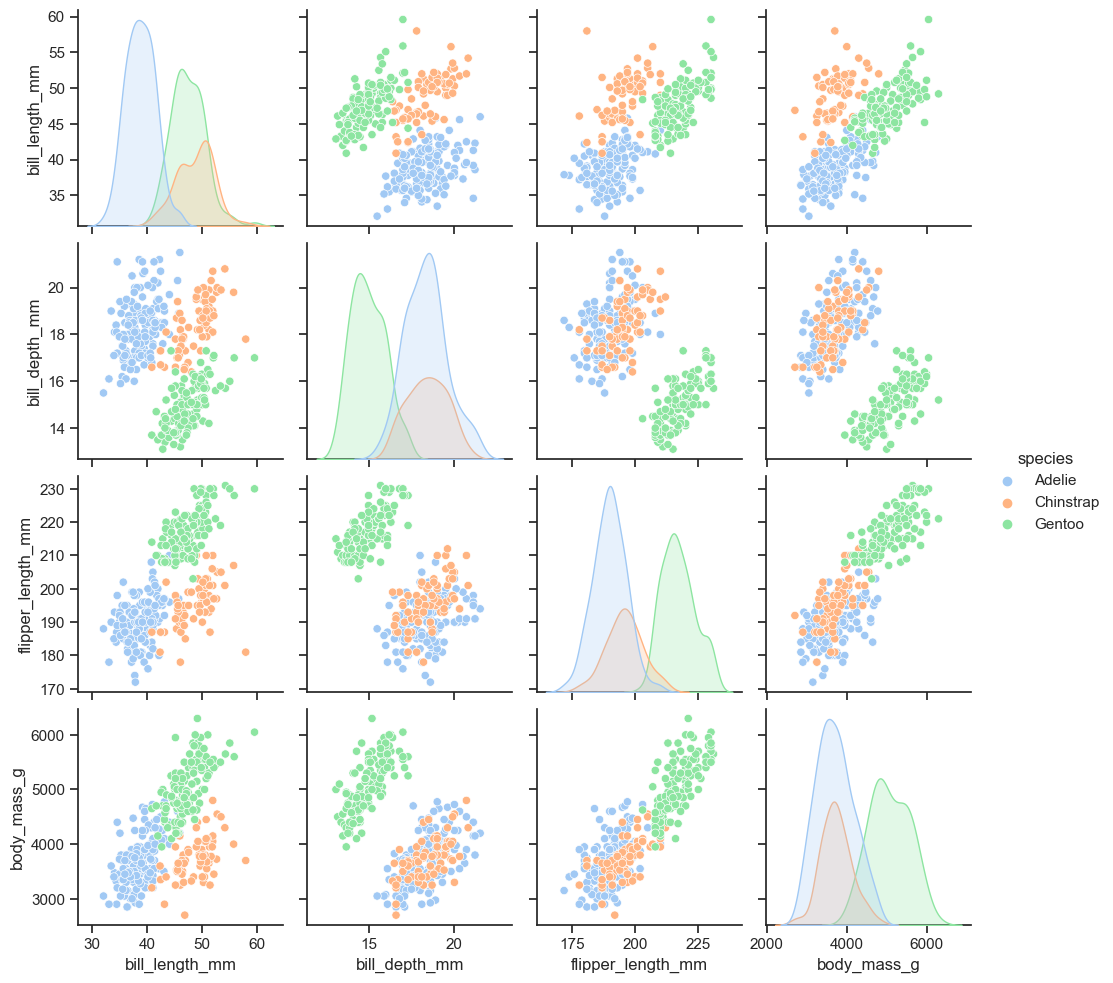

In [20]:
peng=sns.load_dataset('penguins')
sns.pairplot(peng, hue='species')

<AxesSubplot:xlabel='choice', ylabel='coherence'>

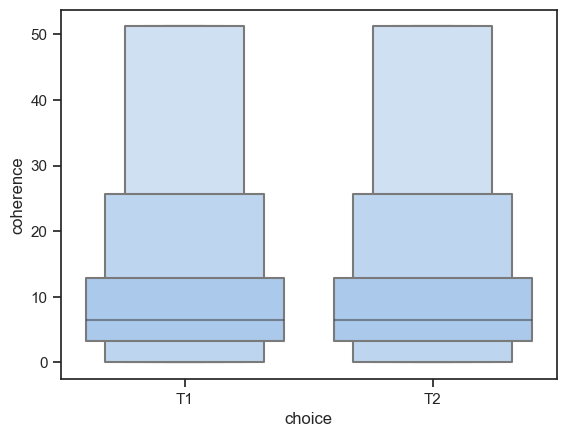

In [21]:
sns.boxenplot(x="choice", y='coherence', color='b', scale='linear', data=nuqta)